In [57]:
import numpy as np
import seaborn as sns
import pandas as pd
from matplotlib import pyplot as plt
import pickle

In [30]:
data_file = 'Housing.csv'
data = pd.read_csv(data_file)

In [31]:
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [32]:
min_price = data['price'].min()
min_price

np.int64(1750000)

In [33]:
data.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [35]:
data.isna().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [36]:
from scipy import stats
z_scores = np.abs(stats.zscore(data["price"]))
data= data[z_scores < 3]  # Keep rows where price z-score < 3
data.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.390000e+02,539.000000,539.000000,539.000000,539.000000,539.000000
mean,4.685700e+06,5117.411874,2.957328,1.274583,1.799629,0.675325
std,1.712754e+06,2156.687235,0.736740,0.482716,0.864801,0.847237
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3577.000000,2.000000,1.000000,1.000000,0.000000
50%,4.319000e+06,4510.000000,3.000000,1.000000,2.000000,0.000000
75%,5.696250e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.015000e+07,16200.000000,6.000000,3.000000,4.000000,3.000000


In [37]:
from scipy import stats
z_scores = np.abs(stats.zscore(data["area"]))
data= data[z_scores < 3]  # Keep rows where price z-score < 3
data.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.320000e+02,532.000000,532.000000,532.000000,532.000000,532.000000
mean,4.657104e+06,5004.043233,2.953008,1.272556,1.804511,0.667293
std,1.685929e+06,1922.096600,0.733674,0.478304,0.867567,0.843844
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3535.000000,2.000000,1.000000,1.000000,0.000000
50%,4.291000e+06,4500.000000,3.000000,1.000000,2.000000,0.000000
75%,5.600000e+06,6265.500000,3.000000,2.000000,2.000000,1.000000
max,1.015000e+07,11460.000000,6.000000,3.000000,4.000000,3.000000


In [38]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data['price'] = scaler.fit_transform(data[['price']])

In [39]:
from sklearn.preprocessing import OneHotEncoder

binary_cols = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
for col in binary_cols:
    data[col] = data[col].map({'yes': 1, 'no': 0})

In [40]:
from sklearn.preprocessing import OrdinalEncoder
ordinal_cols = ['furnishingstatus']
ordinal_encoder = OrdinalEncoder(categories=[['furnished', 'semi-furnished', 'unfurnished']])
data["furnishingstatus"] = ordinal_encoder.fit_transform(data[ordinal_cols])

In [41]:
data.info()


<class 'pandas.core.frame.DataFrame'>
Index: 532 entries, 6 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   price             532 non-null    float64
 1   area              532 non-null    int64  
 2   bedrooms          532 non-null    int64  
 3   bathrooms         532 non-null    int64  
 4   stories           532 non-null    int64  
 5   mainroad          532 non-null    int64  
 6   guestroom         532 non-null    int64  
 7   basement          532 non-null    int64  
 8   hotwaterheating   532 non-null    int64  
 9   airconditioning   532 non-null    int64  
 10  parking           532 non-null    int64  
 11  prefarea          532 non-null    int64  
 12  furnishingstatus  532 non-null    float64
dtypes: float64(2), int64(11)
memory usage: 58.2 KB


In [42]:
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
6,1.000000,8580,4,3,4,1,0,0,0,1,2,1,1.0
8,0.966667,8100,4,1,2,1,1,1,0,1,2,1,0.0
9,0.958333,5750,3,2,4,1,1,0,0,1,1,1,2.0
11,0.944167,6000,4,3,2,1,1,1,1,0,2,0,1.0
12,0.900000,6550,4,2,2,1,0,0,0,1,1,1,1.0


In [43]:
data_copy = data.copy()

In [44]:
data_copy.drop(['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning','prefarea'], axis=1, inplace=True)

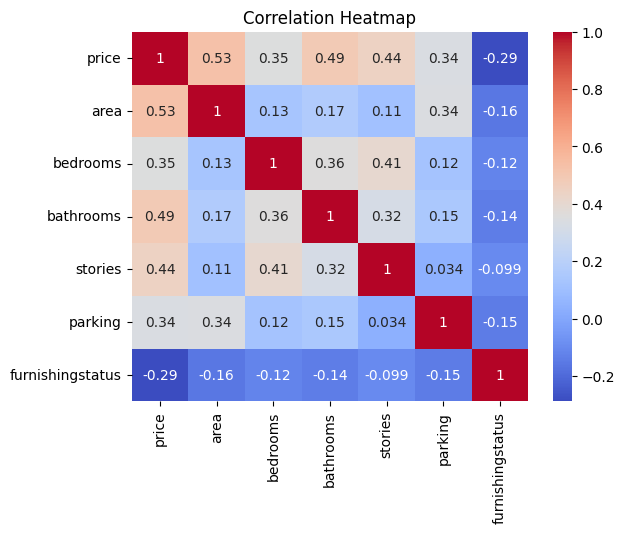

In [45]:
heatmap = sns.heatmap(data_copy.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [46]:
y= data_copy['price']
x=data.drop(['price'], axis=1)  

In [47]:
y.head()

6     1.000000
8     0.966667
9     0.958333
11    0.944167
12    0.900000
Name: price, dtype: float64

In [48]:
x.head()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
6,8580,4,3,4,1,0,0,0,1,2,1,1.0
8,8100,4,1,2,1,1,1,0,1,2,1,0.0
9,5750,3,2,4,1,1,0,0,1,1,1,2.0
11,6000,4,3,2,1,1,1,1,0,2,0,1.0
12,6550,4,2,2,1,0,0,0,1,1,1,1.0


In [49]:
y.value_counts()

price
0.291667    17
0.208333    16
0.375000    11
0.416667     9
0.458333     9
            ..
0.045833     1
0.025000     1
0.012500     1
0.008333     1
0.002042     1
Name: count, Length: 213, dtype: int64

In [50]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
print(x_test.shape)
print(y_test.shape)

(107, 12)
(107,)


In [51]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [52]:
model.fit(x_train, y_train)

LinearRegression()

In [53]:
y_pred = model.predict(x_test)

In [54]:
from sklearn.metrics import mean_squared_error, r2_score

In [55]:
mean_squared_error_test = mean_squared_error(y_test, y_pred)
mean_squared_error_test

0.013251542158475533

In [56]:
r2_score_test = r2_score(y_test, y_pred)
r2_score_test

0.7504557488832733

In [60]:
with open('model.pkl', 'wb') as file:
    pickle.dump(model, file)

In [61]:
with open('price_scaler.pkl', 'wb') as file:
    pickle.dump(scaler, file)